<a href="https://colab.research.google.com/github/abhaymamadapur/CE888/blob/main/Project%202/Project2_TweetEval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# for regex 
import re
import string

#TOKENIZATION import
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import math

from textblob import TextBlob
from wordcloud import WordCloud
from textwrap import wrap


import requests

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
def uploadDatsets(url,filename):
  response = requests.get(url)
  open(filename,'wb').write(r.content)

def loadDataset(filename):
  data = open(filename)
  allTexts = data.readlines()
  data.close()
  df = pd.DataFrame(allTexts)
  return df

In [4]:
# ALL DATASETS URL 

# Emotion train - val - test datasest
EMOTION_TRAIN_TEXT_URL =  "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_text.txt"
EMOTION_TRAIN_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_labels.txt"
EMOTION_VAL_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_text.txt"
EMOTION_VAL_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_labels.txt"
EMOTION_TEST_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_text.txt"
EMOTION_TEST_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_labels.txt"

# Hate train- val - test datasets
HATE_TRAIN_TEXT_URL =  "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_text.txt"
HATE_TRAIN_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_labels.txt"
HATE_VAL_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_text.txt"
HATE_VAL_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_labels.txt"
HATE_TEST_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_text.txt"
HATE_TEST_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_labels.txt"


#Irony train - val - test datasets
IRONY_TRAIN_TEXT_URL =  "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/train_text.txt"
IRONY_TRAIN_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/train_labels.txt"
IRONY_VAL_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/val_text.txt"
IRONY_VAL_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/val_labels.txt"
IRONY_TEST_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/test_text.txt"
IRONY_TEST_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/test_labels.txt"

### Load Emotion Dataset

In [5]:
emotion_train_dataset= pd.read_csv(EMOTION_TRAIN_TEXT_URL,header=None,sep="\n")
emotion_train_label_dataset = pd.read_csv(EMOTION_TRAIN_LABEL_URL,header=None,sep="\n")

emotion_val_text_dataset = pd.read_csv(EMOTION_VAL_TEXT_URL,header=None,sep="\n")
emotion_val_label_dataset = pd.read_csv(EMOTION_VAL_LABEL_URL,header=None,sep="\n")

emotion_test_text_dataset = pd.read_csv(EMOTION_TEST_TEXT_URL,header=None,sep="\n")
emotion_test_label_dataset = pd.read_csv(EMOTION_TEST_LABEL_URL,header=None,sep="\n")

### Load Hate Dataset

In [6]:
hate_train_dataset= pd.read_csv(HATE_TRAIN_TEXT_URL,header=None,sep="\n")
hate_train_label_dataset = pd.read_csv(HATE_TRAIN_LABEL_URL,header=None,sep="\n")

hate_val_text_dataset = pd.read_csv(HATE_VAL_TEXT_URL,header=None,sep="\n")
hate_val_label_dataset = pd.read_csv(HATE_VAL_LABEL_URL,header=None,sep="\n")

hate_test_text_dataset = pd.read_csv(HATE_TEST_TEXT_URL,header=None,sep="\n")
hate_test_label_dataset = pd.read_csv(HATE_TEST_LABEL_URL,header=None,sep="\n")

### Load Irony Dataset

In [7]:
irony_train_dataset= pd.read_csv(IRONY_TRAIN_TEXT_URL,header=None,sep="\n")
irony_train_label_dataset = pd.read_csv(IRONY_TRAIN_LABEL_URL,header=None,sep="\n")

irony_val_text_dataset = pd.read_csv(IRONY_VAL_TEXT_URL,header=None,sep="\n")
irony_val_label_dataset = pd.read_csv(IRONY_VAL_LABEL_URL,header=None,sep="\n")

irony_test_text_dataset = pd.read_csv(IRONY_TEST_TEXT_URL,header=None,sep="\n")
irony_test_label_dataset = pd.read_csv(IRONY_TEST_LABEL_URL,header=None,sep="\n")

In [ ]:
# UPLOAD EMOTION DATASET
uploadDatsets(EMOTION_TRAIN_TEXT_URL,"emotion/train_text.txt")
uploadDatsets(EMOTION_TRAIN_LABEL_URL,"emotion/train_label_text.txt")

uploadDatsets(EMOTION_VAL_TEXT_URL,"emotion/val_text.txt")
uploadDatsets(EMOTION_VAL_LABEL_URL,"emotion/val_labels.txt")

uploadDatsets(EMOTION_TEST_TEXT_URL,"emotion/test_text.txt")
uploadDatsets(EMOTION_TEST_LABEL_URL,"emotion/test_labels.txt")

# UPLOAD HATE DATASET
uploadDatsets(HATE_TRAIN_TEXT_URL,"hate/train_text.txt")
uploadDatsets(HATE_TRAIN_LABEL_URL,"hate/train_label_text.txt")

uploadDatsets(HATE_VAL_TEXT_URL,"hate/val_text.txt")
uploadDatsets(HATE_VAL_LABEL_URL,"hate/val_labels.txt")

uploadDatsets(HATE_TEST_TEXT_URL,"hate/test_text.txt")
uploadDatsets(HATE_TEST_LABEL_URL,"hate/test_labels.txt")

# UPLOAD IRONY DATASET
uploadDatsets(IRONY_TRAIN_TEXT_URL,"irony/train_text.txt")
uploadDatsets(IRONY_TRAIN_LABEL_URL,"irony/train_label_text.txt")

uploadDatsets(IRONY_VAL_TEXT_URL,"irony/val_text.txt")
uploadDatsets(IRONY_VAL_LABEL_URL,"irony/val_labels.txt")

uploadDatsets(IRONY_TEST_TEXT_URL,"irony/test_text.txt")
uploadDatsets(IRONY_TEST_LABEL_URL,"irony/test_labels.txt")

In [8]:
print("-----------------EMOTION-----------------")

print("Train text --------",len(emotion_train_dataset))
print("Train label--------",len(emotion_train_label_dataset))
print("Validation text----",len(emotion_val_text_dataset))
print("Validation label---",len(emotion_val_label_dataset))
print("Test text----------",len(emotion_test_text_dataset))
print("Test label---------",len(emotion_test_label_dataset))

print("-----------------HATE-----------------")
print("Train text --------",len(hate_train_dataset))
print("Train label--------",len(hate_train_label_dataset))
print("Validation text----",len(hate_val_text_dataset))
print("Validation label---",len(hate_val_label_dataset))
print("Test text----------",len(hate_test_text_dataset))
print("Test label---------",len(hate_test_label_dataset))

print("----------------IRONY-----------------")
print("Train text--------",len(irony_train_dataset))
print("Train label-------",len(irony_train_label_dataset))
print("Validation text---",len(irony_val_text_dataset))
print("Validation label--",len(irony_val_label_dataset))
print("Test text---------",len(irony_test_text_dataset))
print("Test label--------",len(irony_test_label_dataset))



-----------------EMOTION-----------------
Train text -------- 3257
Train label-------- 3257
Validation text---- 374
Validation label--- 374
Test text---------- 1421
Test label--------- 1421
-----------------HATE-----------------
Train text -------- 8993
Train label-------- 9000
Validation text---- 989
Validation label--- 1000
Test text---------- 2932
Test label--------- 2970
----------------IRONY-----------------
Train text-------- 2862
Train label------- 2862
Validation text--- 955
Validation label-- 955
Test text--------- 784
Test label-------- 784


### Data Pre Processing 

In [9]:
def removeUserAndLinks(text):
    new_text = []
    for t in text.split(" "):
        t = '' if t.startswith('@') and len(t) > 1 else t
        t = '' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

def replaceAbbrevations(text):
    result = re.sub("don't","do not",text)
    result = re.sub("didn't","did not",result)
    result = re.sub("haven't","have not",result)
    result = re.sub("wouldn't","would not",result)
    result = re.sub("won't","will not",result)
    result = re.sub("we're","we are",result)
    result = re.sub("wasn't","was not",result)
    result = re.sub("doesn't","does not",result)
    result = re.sub("isn't","is not",result)
    result = re.sub("can't","can not",result)
    result = re.sub("i'am","i am",result)
    result = re.sub("i'm","i am",result)
    result = re.sub("i'd","i had",result)
    result = re.sub("they’re","they are",result)
    result = re.sub("there’s","there is",result)
    result = re.sub("you're","you are",result)
    result = re.sub("i'll","i will",result)
    result = re.sub("i've","i have",result)
    result = re.sub("&amp",'',result)
    result = re.sub("you've",'you have',result)
    result = re.sub("you'll", "you will",result)
    return result

def removeStopWords(sentence):
  stop_words_list = set(stopwords.words('english'))
  result = ([x for x in sentence.split() if not x in stop_words_list])
  return " ".join(result)

def textLemmatization(sentence):
  lemmatizer=WordNetLemmatizer()
  tokens = word_tokenize(sentence)
  lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in tokens])
  result = ([x for x in lemmatized_output.split() if not x in stop_words_list])
  return " ".join(result)

In [10]:
def textNormalization(dataset):
  cleanTexts =[]
  digits_regex= '\w*\d\w*'
  nonAscii_regex = r'[^\x00-\x7F]+'
  white_space_regex = ' +'

  for eachText in dataset.values:
      finalText = eachText[0]
      finalText = finalText.lower()                                                                 # CONVERT TEXT TO LOWER CASE
      finalText = removeUserAndLinks(finalText)                                                             # REMOVE @usernames,"https"
      finalText = re.sub(digits_regex, '', finalText)                                               # REMOVE ANY NUMBERS IN THE TEXT 
      finalText = replaceAbbrevations(finalText)                                                    # REPLACE any abbrevations in the text 
      finalText = finalText.translate(str.maketrans("","", string.punctuation))                     # REMOVE Punctuations 
      finalText = re.sub(white_space_regex,' ',finalText)                                           # REMOVE White Spaces
      finalText = re.sub(nonAscii_regex,'', finalText)                                              # REMOVE non-ASCII characters 
      finalText = removeStopWords(finalText)
      # finalText = textLemmatization(finalText)                                                    #Lemmatizations of sentences
      cleanTexts.append(finalText)
  return pd.DataFrame(cleanTexts) 
    

In [11]:
input_str =["The striped bats are hanging on their feet for best don't i'am haven't didn't wasn't "]
textNormalization(pd.DataFrame(input_str))[0][0]

'striped bats hanging feet best'

### Clean Emotion DataSet



In [12]:
clean_emotion_train_df = textNormalization(emotion_train_dataset)
clean_emotion_val_df = textNormalization(emotion_val_text_dataset)
clean_emotion_test_df = textNormalization(emotion_test_text_dataset)

### Clean Hate DataSet



In [13]:
clean_hate_train_df = textNormalization(hate_train_dataset)
clean_hate_val_df = textNormalization(hate_val_text_dataset)
clean_hate_test_df = textNormalization(hate_test_text_dataset)


### Clean Irony DataSet



In [14]:
clean_irony_train_df = textNormalization(irony_train_dataset)
clean_irony_val_df = textNormalization(irony_val_text_dataset)
clean_irony_test_df = textNormalization(irony_test_text_dataset)

#### Emotion DataFrame with labels

In [15]:
emotion_train_df = clean_emotion_train_df.copy()
emotion_train_df['labels'] = emotion_train_label_dataset
emotion_train_df.head()

,0,labels
0,worry payment problem may never joyce meyer mo...,2
1,roommate okay spell autocorrect terrible first...,0
2,thats cute atsu probably shy photos cherry hel...,1
3,rooneys fucking untouchable fucking dreadful d...,0
4,pretty depressing u hit pan ur favourite highl...,3


#### Hate DataFrame with Labels

In [16]:
hate_train_df = clean_hate_train_df.copy()
hate_train_df['labels'] = hate_train_label_dataset
hate_train_df.head()

,0,labels
0,nice new signage concerned beatlemania style h...,0
1,woman fucked multiple times saying yo dick sma...,1
2,real talk eyes gouged rapefugee,1
3,girlfriend lookin like groupie bitch,1
4,hysterical woman like,0


#### Irony DataFrame with Labels

In [17]:
irony_train_df = clean_irony_train_df.copy()
irony_train_df['labels'] = irony_train_label_dataset
irony_train_df.head()

,0,labels
0,seeing ppl walking w crutches makes really exc...,1
1,look girl broken smile ask wants stay loved,0
2,remember buy books online servicewithasmile,1
3,banded wearing clothes karma,1
4,found etch sketch apps oldschool notoldschool,1


## Exploratory Data Analysis

In [18]:
def exploreDataAnalysis(dataset):
  train_df = dataset.copy()
  train_df['polarity'] = train_df[0].map(lambda text: TextBlob(text).sentiment.polarity)
  train_df['review_len'] = train_df[0].astype(str).apply(len)
  train_df['word_count'] = train_df[0].apply(lambda x: len(str(x).split()))
  train_df.head()  

  print('5 random reviews with the highest positive sentiment polarity: \n')
  cl = train_df.loc[train_df.polarity == 1, [0]].sample(5).values
  for c in cl:
      print(c[0])

  plt.figure()
  plt.hist(x=train_df['polarity'],bins=10)
  plt.show()

  text = " ".join(values for values in train_df[0])
  wordcloud = WordCloud()
  wordcloud.generate(text)
  plt.figure(figsize=(15,7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

5 random reviews with the highest positive sentiment polarity: 

trump king relentless selfpromoters give rip anyone else perfect match donalds
oh btw month depressionfree time got relapse superb
wonderful experience watching yesterday thankyou
boys dm pictures cocks best one get uploaded cumtribute dm snapchat snapme nudes dickpic cocktribute
feels like lost best friend lost fml missingyou


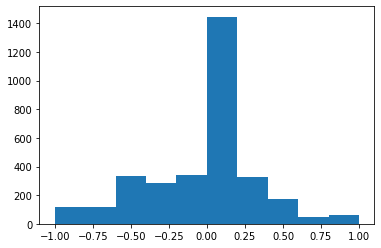

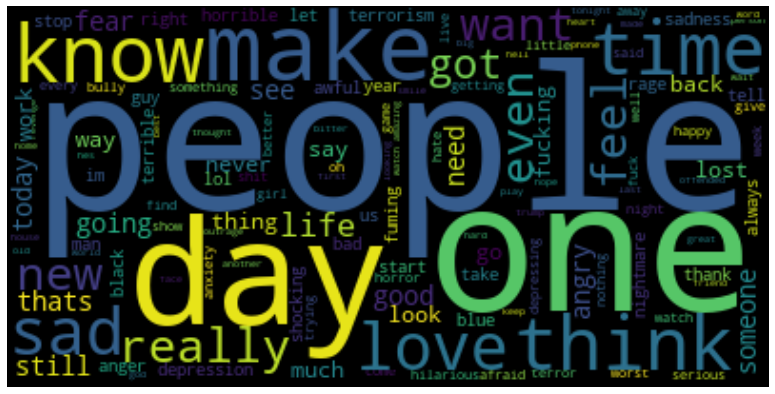

In [19]:
exploreDataAnalysis(clean_emotion_train_df)

5 random reviews with the highest positive sentiment polarity: 

replaceable best describes life
best solution bring permanent peace valley encourage migration sikhsjatsrajputs valleyset business
script woman overcoming rape think youd perfect
awesome story two immigrant organic farmers hand read via
knew bobby shmruda respected women said aint hoe get traphouse legendary


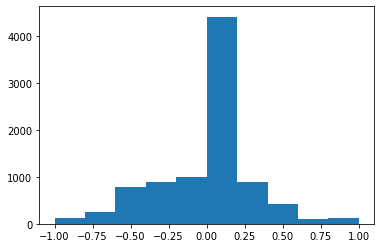

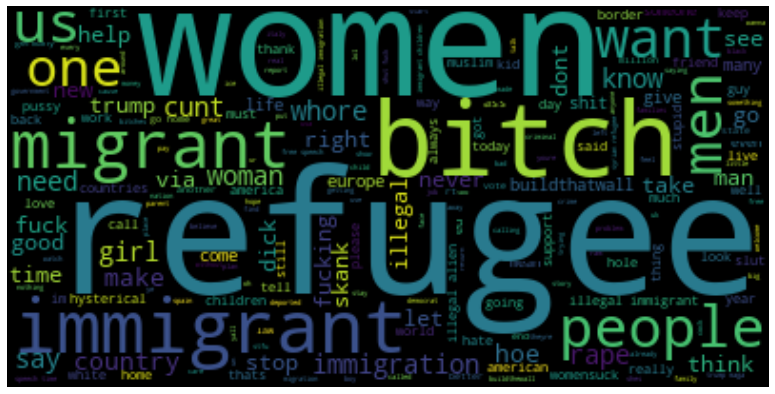

In [20]:
exploreDataAnalysis(clean_hate_train_df)

5 random reviews with the highest positive sentiment polarity: 

montana best versace remix dude goes
already tell today going wonderful day
need something legendary winter break
hour nap ct scan hospital perfect timing
perfect way start morning


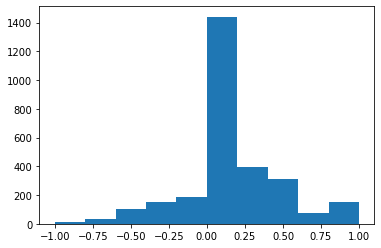

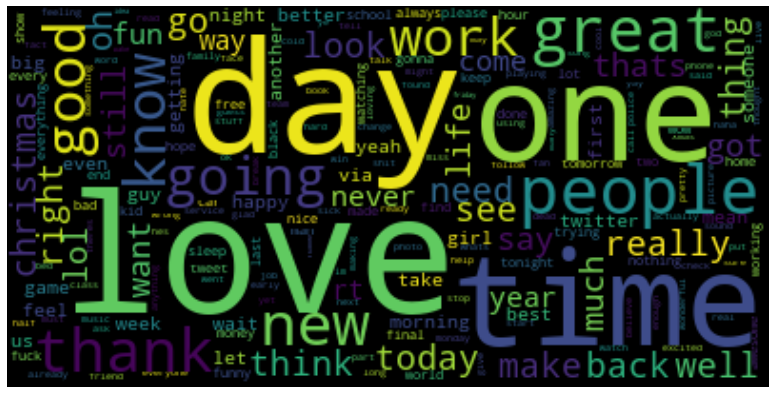

In [21]:
exploreDataAnalysis(clean_irony_train_df)

In [29]:
emotion_train_df.labels.value_counts()

0    1400
3     855
1     708
2     294
Name: labels, dtype: int64

In [30]:
irony_train_df.labels.value_counts()

1    1445
0    1417
Name: labels, dtype: int64

In [31]:
hate_train_df.labels.value_counts()

0    5213
1    3780
Name: labels, dtype: int64

### MODEL TRAINING 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.model_selection import train_test_split


#### Training dataset model fit


In [34]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1))
text_counts= cv.fit_transform(clean_irony_train_df[0])

In [24]:
text_counts.shape

(3257, 8088)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, irony_train_label_dataset[0], test_size=0.3, random_state=1)


In [36]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

In [37]:
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6053550640279395


### PREDICTION

(2862, 1)

In [38]:
clean_irony_test_df = textNormalization(irony_test_text_dataset)

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(clean_irony_test_df[0])


In [39]:
print(text_counts.shape)

(784, 3154)


In [40]:
print(irony_test_label_dataset.shape)

(784, 1)


In [ ]:
predicted= clf.predict(text_counts)
print("MultinomialNB Accuracy:",metrics.accuracy_score(irony_test_label_dataset[0], predicted))